Data analysis in python 
Step 1 : 
Questions :
1) How many companies participated in EB donations.
2) How many Political parties participated in EB donations.
3) How much worth of electoral bonds were purchased by these companies.
4) How much worth of electoral bonds were encashed by these Political parties.
5) Who were the top donors.
6) Who were the top receivers.
7) What is the most used denomination.
8) Year wise and month wise break-up of donations.




In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

donors = pd.read_csv('DONORS.csv',index_col=0)
encashment = pd.read_csv('ENCASHMENT.csv', index_col=0)


Description of Data 

In [154]:
print('Initial look at donor\'s data.')
print(donors.describe().astype('int64'))
print(donors.info())

print('Initial look at df data.')
print(encashment.describe().astype('int64'))
print(donors.info())

Initial look at donor's data.
       Denomination
count         18871
mean        6441372
std         4538946
min            1000
25%         1000000
50%        10000000
75%        10000000
max        10000000
<class 'pandas.core.frame.DataFrame'>
Index: 19207 entries, 12-Apr-19 to 11-Jan-24
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchaser Name  18871 non-null  object 
 1   Denomination    18871 non-null  float64
dtypes: float64(1), object(1)
memory usage: 450.2+ KB
None
Initial look at df data.
       Denomination
count         20421
mean        6252920
std         4576321
min            1000
25%         1000000
50%        10000000
75%        10000000
max        10000000
<class 'pandas.core.frame.DataFrame'>
Index: 19207 entries, 12-Apr-19 to 11-Jan-24
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchaser Name  18871

Total donation per company and per party.

In [76]:
DonationPerCompany = donors.groupby('Purchaser Name').sum().astype('int64')
EncashmentPerParty = encashment.groupby('Name of the Political Party').sum().astype('int64')

print('Total donation per company')
print(DonationPerCompany.head())
print('Total donation per company.')
print(EncashmentPerParty.head())

print(f'Number of companies that participated {len(DonationPerCompany.index.values)}')
print(f'Total sum of money donated by companies that participated {DonationPerCompany.sum()}')

print(f'Number of Political parties that participated {len(EncashmentPerParty.index.values)}')
print(f'Total sum of money encashed by Political parties that participated {EncashmentPerParty.sum()}')

Total donation per company
                                    Denomination
Purchaser Name                                  
14 REELS PLUS LLP                       10000000
A B C INDIA LIMITED                      4000000
AAKANKSHA BAHETY                         1000000
AALAYA CONSTRUCTIONS                    10000000
AARISH SOLAR POWER PRIVATE LIMITED      20000000
Total donation per company.
                                          Denomination
Name of the Political Party                           
AAM AADMI PARTY                              654500000
ADYAKSHA SAMAJVADI PARTY                     140500000
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      60500000
ALL INDIA TRINAMOOL CONGRESS               16095314000
BHARAT RASHTRA SAMITHI                     12147099000
Number of companies that participated 1316
Total sum of money donated by companies that participated Denomination    121555132000
dtype: int64
Number of Political parties that participated 27
Total sum of money encash

Comparision of Companies

Total money donated: Denomination    121555132000
dtype: int64
Total money donated by top 5 Denomination    31916500000
dtype: int64
Total percent donation by top 5 as compared to total Denomination    26.25681
dtype: float64
Total percent donation by top 10 as compared to total Denomination    34.549343
dtype: float64


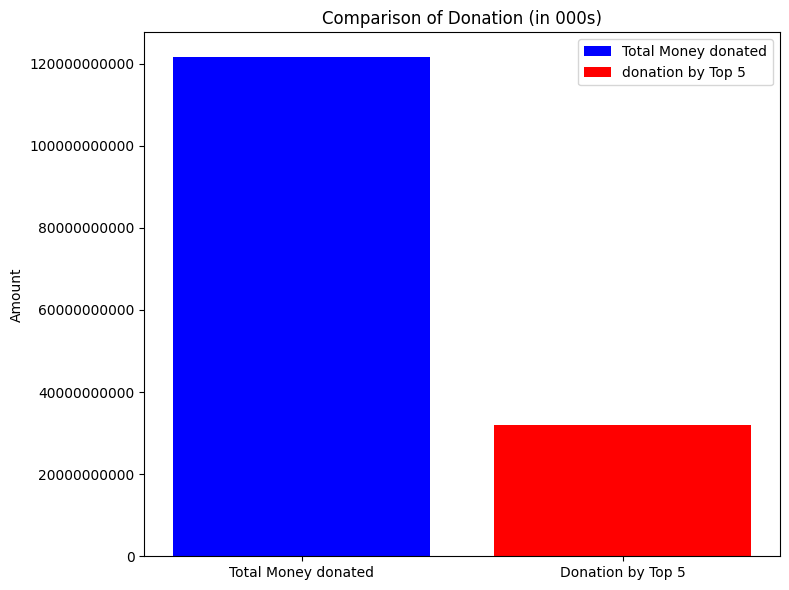

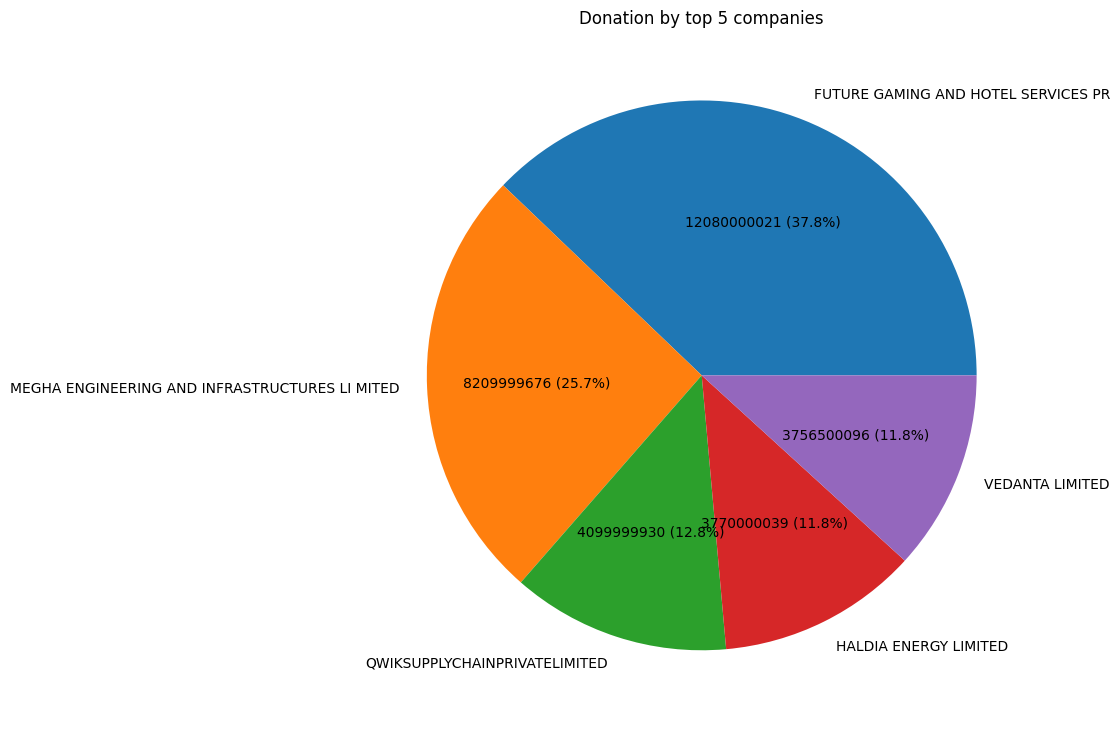

In [105]:
DonationPerCompanyHighest = DonationPerCompany.sort_values('Denomination',ascending=False)
DonationPerCompanyLowest = DonationPerCompany.sort_values('Denomination')

TotalMoneydonated = DonationPerCompany.sum()
donationbyTop5 = DonationPerCompanyHighest.head().sum()
print(f'Total money donated: {TotalMoneydonated}')
print(f'Total money donated by top 5 {donationbyTop5}')
print(f'Total percent donation by top 5 as compared to total {(donationbyTop5 / TotalMoneydonated)*100}')
print(f'Total percent donation by top 10 as compared to total {(DonationPerCompanyHighest.head(10).sum() / TotalMoneydonated)*100}')

plt.figure(figsize=(8, 6))
plt.bar('Total Money donated', TotalMoneydonated, color='blue', label='Total Money donated')
plt.bar('Donation by Top 5', donationbyTop5, color='red', label='donation by Top 5')
plt.ylabel('Amount')
plt.title('Comparison of Donation (in 000s)')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(DonationPerCompanyHighest['Denomination'].head(), labels=DonationPerCompanyHighest.index.values[:5], autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(DonationPerCompanyHighest['Denomination'].head()) / 100, p))
plt.title('Donation by top 5 companies')
plt.tight_layout()
plt.show()



# plt.figure(figsize=(20, 10))
# plt.bar(DonationPerCompany.index.values,DonationPerCompany['Denomination'])
# plt.ylabel('Amount')
# plt.title('Comparison of Donation (in 000s)')
# plt.legend()
# plt.xticks(rotation=90)
# plt.ticklabel_format(style='plain', axis='y')
# plt.tight_layout()
# plt.show()



Money from parties

Total money encashed: Denomination    127690893000
dtype: int64
Total money encashment by top 5 Denomination    110821179000
dtype: int64
Total percent encashment by top 5 as compared to total Denomination    86.788632
dtype: float64


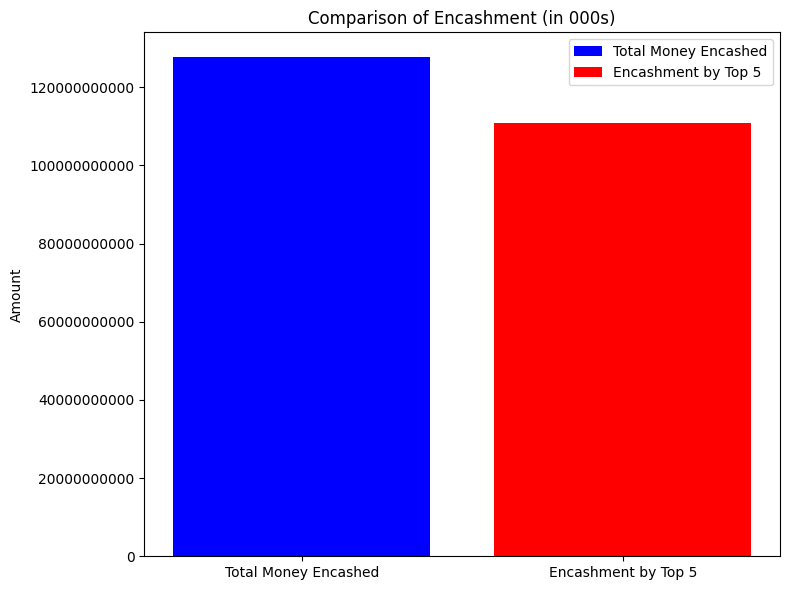

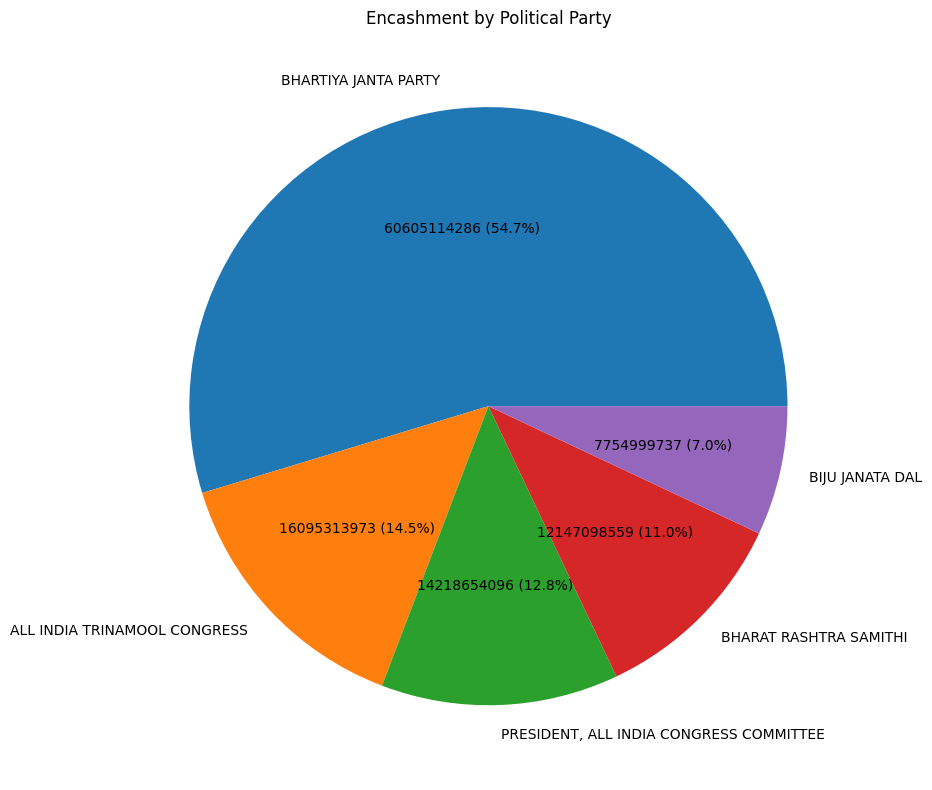

In [68]:
EncashmentPerPartyHighest = EncashmentPerParty.sort_values('Denomination',ascending=False)
EncashmentPerPartyLowest = EncashmentPerParty.sort_values('Denomination')

TotalMoneyEncashed = EncashmentPerParty.sum()
EncashmentbyTop5 = EncashmentPerPartyHighest.head().sum()
print(f'Total money encashed: {TotalMoneyEncashed}')
print(f'Total money encashment by top 5 {EncashmentbyTop5}')
print(f'Total percent encashment by top 5 as compared to total {(EncashmentbyTop5 / TotalMoneyEncashed)*100}')

plt.figure(figsize=(8, 6))
plt.bar('Total Money Encashed', TotalMoneyEncashed, color='blue', label='Total Money Encashed')
plt.bar('Encashment by Top 5', EncashmentbyTop5, color='red', label='Encashment by Top 5')
plt.ylabel('Amount')
plt.title('Comparison of Encashment (in 000s)')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.pie(EncashmentPerPartyHighest['Denomination'].head(), labels=EncashmentPerPartyHighest.index.values[:5], autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(EncashmentPerPartyHighest['Denomination'].head()) / 100, p))
plt.title('Encashment by Political Party')
plt.tight_layout()
plt.show()



Least money

In [114]:
DonationPerCompanyLowest = DonationPerCompany.sort_values('Denomination')
DonationPerCompanyLowest[DonationPerCompanyLowest['Denomination']<100000]

,Denomination
Purchaser Name,
POONAM AGARWAL,1000
ARAVIND S,1000
DAMINI NATH,1000
PAWAN AGARWAL,1000
PUNIT DEVENDRABHAI BHANDERI,1000
ADWITA FINVEST PRIVATE LIMITED,1000
ANKUR SINGHAL S O SH ANIL SIN,1000
MR. SAMEER BHATIA,1000
N RAMAMOORTHY,1000


denomination wise breakup

Denomination
10000000.0    12207
1000000.0      5366
100000.0       2526
10000.0         219
1000.0          103
Name: count, dtype: int64


Text(0, 0.5, 'number of denominations')

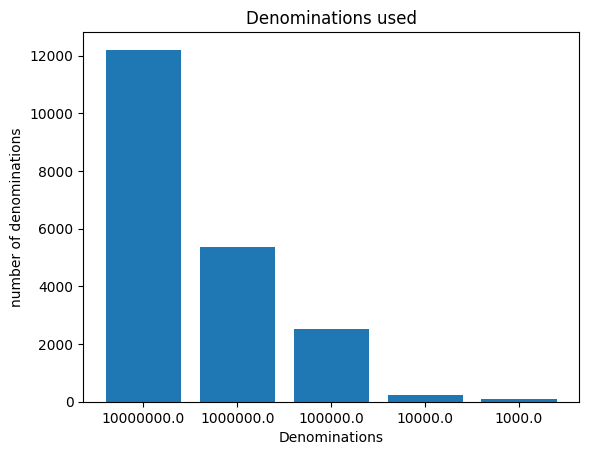

In [102]:
deno = encashment['Denomination'].value_counts()
print(deno)

plt.bar([str(d) for d in deno.index.values], deno)
plt.title('Denominations used')
plt.xlabel('Denominations')
plt.ylabel('number of denominations')

Year
2023.0    6365
2022.0    5300
2019.0    4783
2021.0    2642
2024.0     872
2020.0     459
Name: count, dtype: int64


C:\Users\kant\AppData\Local\Temp\ipykernel_3988\3599200368.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Encashment'] = pd.to_datetime(encashment.index.tolist())


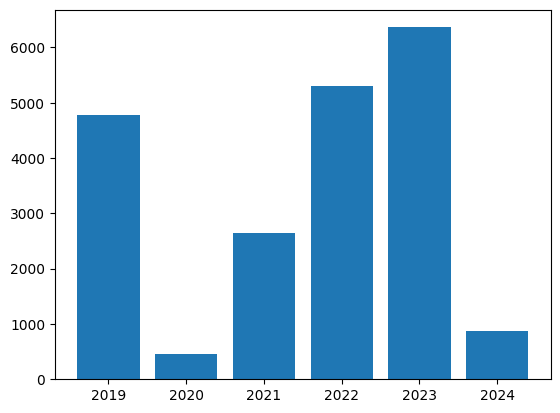

Month
4.0     6221
10.0    4514
1.0     3445
7.0     2406
11.0    2163
5.0     1168
12.0     298
2.0      206
Name: count, dtype: int64


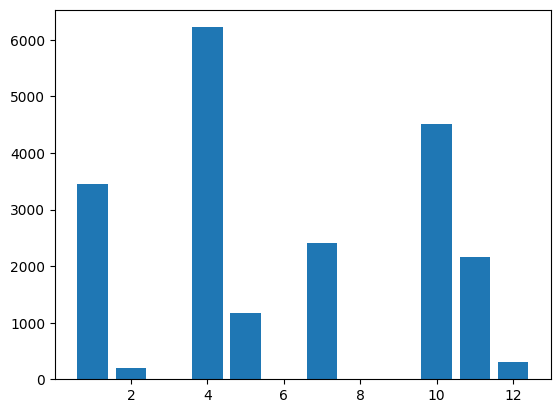

In [161]:
df = pd.DataFrame()
df['Date of Encashment'] = pd.to_datetime(encashment.index.tolist())
df['Denomination'] = encashment['Denomination'].values

df['Year'] = df['Date of Encashment'].dt.year
df['Month'] = df['Date of Encashment'].dt.month
df['Day'] = df['Date of Encashment'].dt.day
entriesPerYear = df['Year'].value_counts()
entriesPerMonth = df['Month'].value_counts()

print(entriesPerYear)
plt.bar(entriesPerYear.index.values, entriesPerYear)
plt.show()
print(entriesPerMonth)
plt.bar(entriesPerMonth.index.values, entriesPerMonth)
plt.show()



Year
2023.0    6399
2022.0    5314
2019.0    3154
2021.0    2647
2024.0     897
2020.0     460
Name: count, dtype: int64


C:\Users\kant\AppData\Local\Temp\ipykernel_3988\2208322695.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date of donation'] = pd.to_datetime(donors.index.tolist())


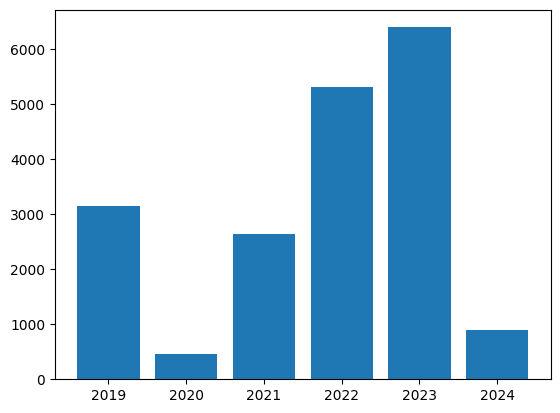

Month
10.0    4662
4.0     4590
1.0     3692
7.0     2417
11.0    2063
5.0     1187
12.0     260
Name: count, dtype: int64


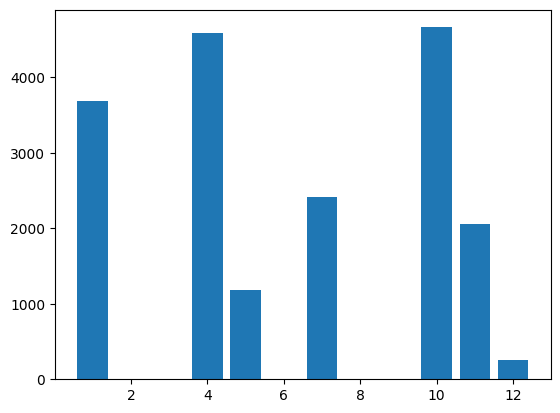

In [162]:
df2 = pd.DataFrame()
df2['Date of donation'] = pd.to_datetime(donors.index.tolist())
df2['Denomination'] = donors['Denomination'].values

# Extract year, month, and day information
df2['Year'] = df2['Date of donation'].dt.year
df2['Month'] = df2['Date of donation'].dt.month
df2['Day'] = df2['Date of donation'].dt.day
entriesPerYear = df2['Year'].value_counts()
entriesPerMonth = df2['Month'].value_counts()

print(entriesPerYear)
plt.bar(entriesPerYear.index.values, entriesPerYear)
plt.show()
print(entriesPerMonth)
plt.bar(entriesPerMonth.index.values, entriesPerMonth)
plt.show()
